In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [84]:
train = pd.read_csv('../raw data 100 customers.csv')

In [85]:
print(train.shape)
train.tail()

(100, 23)


,Customer_ID,Preferred_Store_Number,Home_Store_Number,Loyalty_Account_Creation_Date,Loyalty_Account_Effective_Date,Tier,TierRenewalStatus,TierExpirationStatus,Tenure_in_days,Total_Dollar_Spent,...,Lifecycle_Segment,Lifecycle_SubSegment,Current_Segment,Purchase_Amt,Trade_Amt,Transaction_Count,Points_Earned_Till_Date,City,State,Country_Code
95,1201138314,NaN,NaN,NaN,NaN,Non,NotEligible,NotEligible,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1241469764,NaN,NaN,NaN,NaN,Non,NotEligible,NotEligible,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1194595704,NaN,NaN,NaN,NaN,Non,NotEligible,NotEligible,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1191784165,NaN,NaN,NaN,NaN,Non,NotEligible,NotEligible,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,1173981832,NaN,NaN,NaN,NaN,Non,NotEligible,NotEligible,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
Customer_ID                           100 non-null int64
Preferred_Store_Number                10 non-null float64
Home_Store_Number                     14 non-null float64
Loyalty_Account_Creation_Date         13 non-null object
Loyalty_Account_Effective_Date        13 non-null object
Tier                                  100 non-null object
TierRenewalStatus                     100 non-null object
TierExpirationStatus                  100 non-null object
Tenure_in_days                        13 non-null float64
Total_Dollar_Spent                    16 non-null float64
Age_In_Years                          14 non-null float64
Gender_Description                    100 non-null object
Loyalty_Account_Status_Description    12 non-null object
Lifecycle_Segment                     0 non-null float64
Lifecycle_SubSegment                  0 non-null float64
Current_Segment                 

In [17]:
train.dtypes

Customer_ID                             int64
Preferred_Store_Number                float64
Home_Store_Number                     float64
Loyalty_Account_Creation_Date          object
Loyalty_Account_Effective_Date         object
Tier                                   object
TierRenewalStatus                      object
TierExpirationStatus                   object
Tenure_in_days                        float64
Total_Dollar_Spent                    float64
Age_In_Years                          float64
Gender_Description                     object
Loyalty_Account_Status_Description     object
Lifecycle_Segment                     float64
Lifecycle_SubSegment                  float64
Current_Segment                       float64
Purchase_Amt                          float64
Trade_Amt                             float64
Transaction_Count                     float64
Points_Earned_Till_Date               float64
City                                  float64
State                             

In [18]:
train.describe()

,Customer_ID,Preferred_Store_Number,Home_Store_Number,Tenure_in_days,Total_Dollar_Spent,Age_In_Years,Lifecycle_Segment,Lifecycle_SubSegment,Current_Segment,Purchase_Amt,Trade_Amt,Transaction_Count,Points_Earned_Till_Date,City,State,Country_Code
count,1.000000e+02,10.000000,14.000000,13.000000,16.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,0.0,0.0,0.0
mean,1.200283e+09,4273.100000,4065.142857,2638.923077,2632.536250,36.857143,NaN,NaN,NaN,NaN,NaN,NaN,104120.615385,NaN,NaN,NaN
std,4.952769e+07,1726.845901,2056.413864,927.684974,2428.860149,13.827827,NaN,NaN,NaN,NaN,NaN,NaN,74253.650959,NaN,NaN,NaN
min,1.010408e+09,717.000000,650.000000,981.000000,0.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,20000.000000,NaN,NaN,NaN
25%,1.169348e+09,3372.500000,2916.250000,1861.000000,792.955000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,53500.000000,NaN,NaN,NaN
50%,1.206173e+09,4401.500000,4150.500000,2782.000000,2053.410000,29.500000,NaN,NaN,NaN,NaN,NaN,NaN,66720.000000,NaN,NaN,NaN
75%,1.236911e+09,5176.250000,5487.250000,3545.000000,4133.885000,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,141000.000000,NaN,NaN,NaN
max,1.285803e+09,6631.000000,6966.000000,3686.000000,8277.530000,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,281365.000000,NaN,NaN,NaN


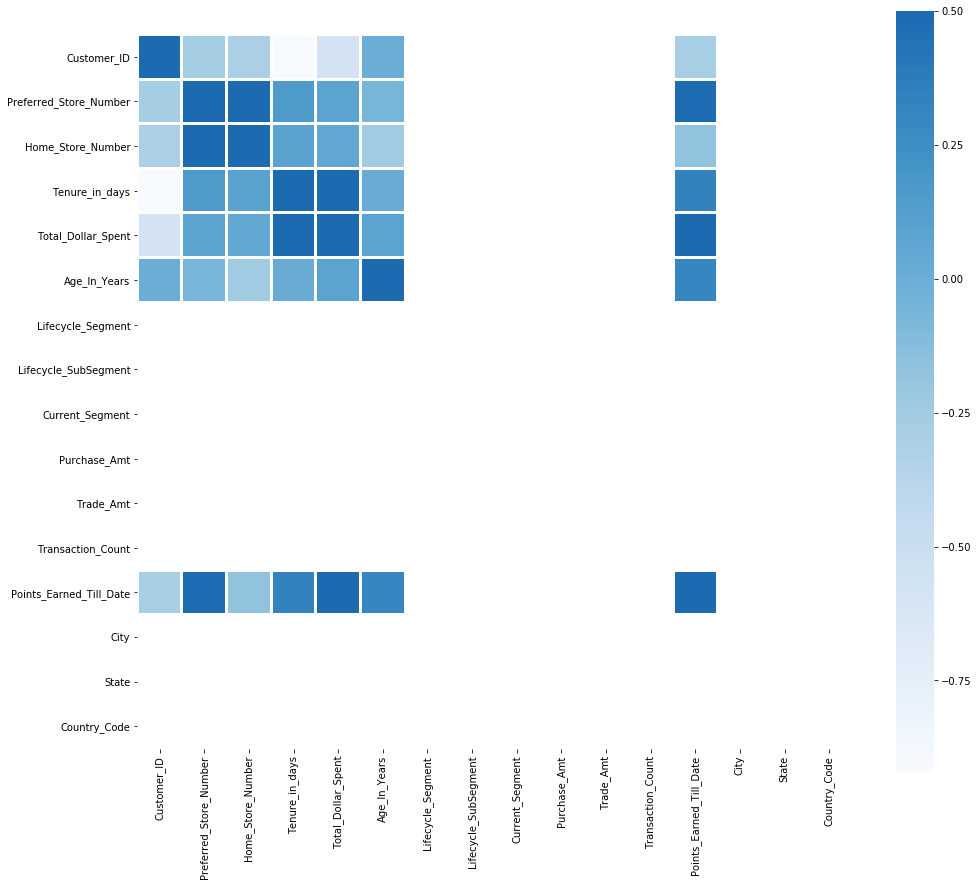

In [20]:

corr = train.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [25]:

print(train.columns)

train.corr()['Country_Code']

Index(['Customer_ID', 'Preferred_Store_Number', 'Home_Store_Number',
       'Loyalty_Account_Creation_Date', 'Loyalty_Account_Effective_Date',
       'Tier', 'TierRenewalStatus', 'TierExpirationStatus', 'Tenure_in_days',
       'Total_Dollar_Spent', 'Age_In_Years', 'Gender_Description',
       'Loyalty_Account_Status_Description', 'Lifecycle_Segment',
       'Lifecycle_SubSegment', 'Current_Segment', 'Purchase_Amt', 'Trade_Amt',
       'Transaction_Count', 'Points_Earned_Till_Date', 'City', 'State',
       'Country_Code'],
      dtype='object')


Customer_ID               NaN
Preferred_Store_Number    NaN
Home_Store_Number         NaN
Tenure_in_days            NaN
Total_Dollar_Spent        NaN
Age_In_Years              NaN
Lifecycle_Segment         NaN
Lifecycle_SubSegment      NaN
Current_Segment           NaN
Purchase_Amt              NaN
Trade_Amt                 NaN
Transaction_Count         NaN
Points_Earned_Till_Date   NaN
City                      NaN
State                     NaN
Country_Code              NaN
Name: Country_Code, dtype: float64

In [29]:
filled_data = train
for i in train.columns:
    filled_data[i] = filled_data[i].fillna(99)

In [30]:
filled_data.tail()

,Customer_ID,Preferred_Store_Number,Home_Store_Number,Loyalty_Account_Creation_Date,Loyalty_Account_Effective_Date,Tier,TierRenewalStatus,TierExpirationStatus,Tenure_in_days,Total_Dollar_Spent,...,Lifecycle_Segment,Lifecycle_SubSegment,Current_Segment,Purchase_Amt,Trade_Amt,Transaction_Count,Points_Earned_Till_Date,City,State,Country_Code
95,1201138314,99.0,99.0,99,99,Non,NotEligible,NotEligible,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
96,1241469764,99.0,99.0,99,99,Non,NotEligible,NotEligible,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
97,1194595704,99.0,99.0,99,99,Non,NotEligible,NotEligible,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
98,1191784165,99.0,99.0,99,99,Non,NotEligible,NotEligible,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
99,1173981832,99.0,99.0,99,99,Non,NotEligible,NotEligible,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


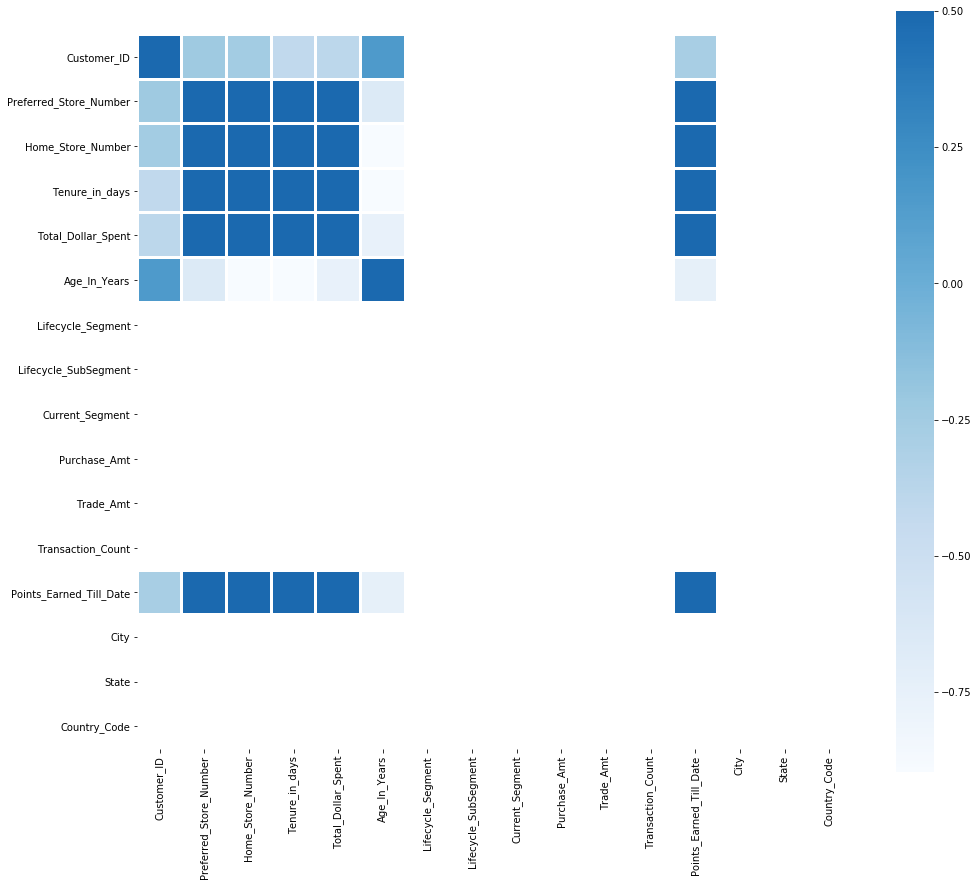

In [31]:

corr = train.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [32]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
Customer_ID                           100 non-null int64
Preferred_Store_Number                100 non-null float64
Home_Store_Number                     100 non-null float64
Loyalty_Account_Creation_Date         100 non-null object
Loyalty_Account_Effective_Date        100 non-null object
Tier                                  100 non-null object
TierRenewalStatus                     100 non-null object
TierExpirationStatus                  100 non-null object
Tenure_in_days                        100 non-null float64
Total_Dollar_Spent                    100 non-null float64
Age_In_Years                          100 non-null float64
Gender_Description                    100 non-null object
Loyalty_Account_Status_Description    100 non-null object
Lifecycle_Segment                     100 non-null float64
Lifecycle_SubSegment                  100 non-null float64
Current_Segment     

In [50]:
categ_list = [ 
         'Tier', 
         'TierRenewalStatus',
         'TierExpirationStatus'
            ]

categ_data = filled_data[categ_list]
categ_data.head()

,Tier,TierRenewalStatus,TierExpirationStatus
0,Player,Lapsed from Renewing Elite Pro,Expired
1,Player,Lapsed from Renewing Elite Pro,Expired
2,Player,Lapsed from Renewing Elite Pro,Expired
3,Player,Lapsed from Renewing Elite Pro,Expired
4,Player,Lapsed from Renewing Elite Pro,Expired


In [51]:
digit_data_list = ['Customer_ID', 
                   'Preferred_Store_Number', 
                   'Home_Store_Number',
                   'Loyalty_Account_Creation_Date', 
                   'Loyalty_Account_Effective_Date',
                   'Tenure_in_days', 
                   'Total_Dollar_Spent', 
                   'Age_In_Years',
                   'Lifecycle_Segment', 
                   'Lifecycle_SubSegment', 
                   'Current_Segment', 
                   'Purchase_Amt', 
                   'Trade_Amt', 
                   'Transaction_Count', 
                   'Points_Earned_Till_Date', 
                   'City', 
                   'State', 
                   'Country_Code'                   
                    ]

digit_data = filled_data[digit_data_list]

digit_data.head()

,Customer_ID,Preferred_Store_Number,Home_Store_Number,Loyalty_Account_Creation_Date,Loyalty_Account_Effective_Date,Tenure_in_days,Total_Dollar_Spent,Age_In_Years,Lifecycle_Segment,Lifecycle_SubSegment,Current_Segment,Purchase_Amt,Trade_Amt,Transaction_Count,Points_Earned_Till_Date,City,State,Country_Code
0,1058530417,6213.0,6213.0,2010-12-10,2016-04-10,3686.0,3942.37,30.0,99.0,99.0,99.0,99.0,99.0,99.0,185710.0,99.0,99.0,99.0
1,1089486330,3255.0,5588.0,2011-03-04,2016-12-19,3602.0,8277.53,26.0,99.0,99.0,99.0,99.0,99.0,99.0,141000.0,99.0,99.0,99.0
2,1259811549,717.0,717.0,2013-10-07,2013-10-07,2654.0,1543.72,37.0,99.0,99.0,99.0,99.0,99.0,99.0,55000.0,99.0,99.0,99.0
3,1010407591,5185.0,5185.0,2011-03-29,2018-04-13,3577.0,4071.94,67.0,99.0,99.0,99.0,99.0,99.0,99.0,120000.0,99.0,99.0,99.0
4,1095869306,5150.0,5150.0,2011-04-30,2017-09-03,3545.0,4319.72,27.0,99.0,99.0,99.0,99.0,99.0,99.0,138613.0,99.0,99.0,99.0


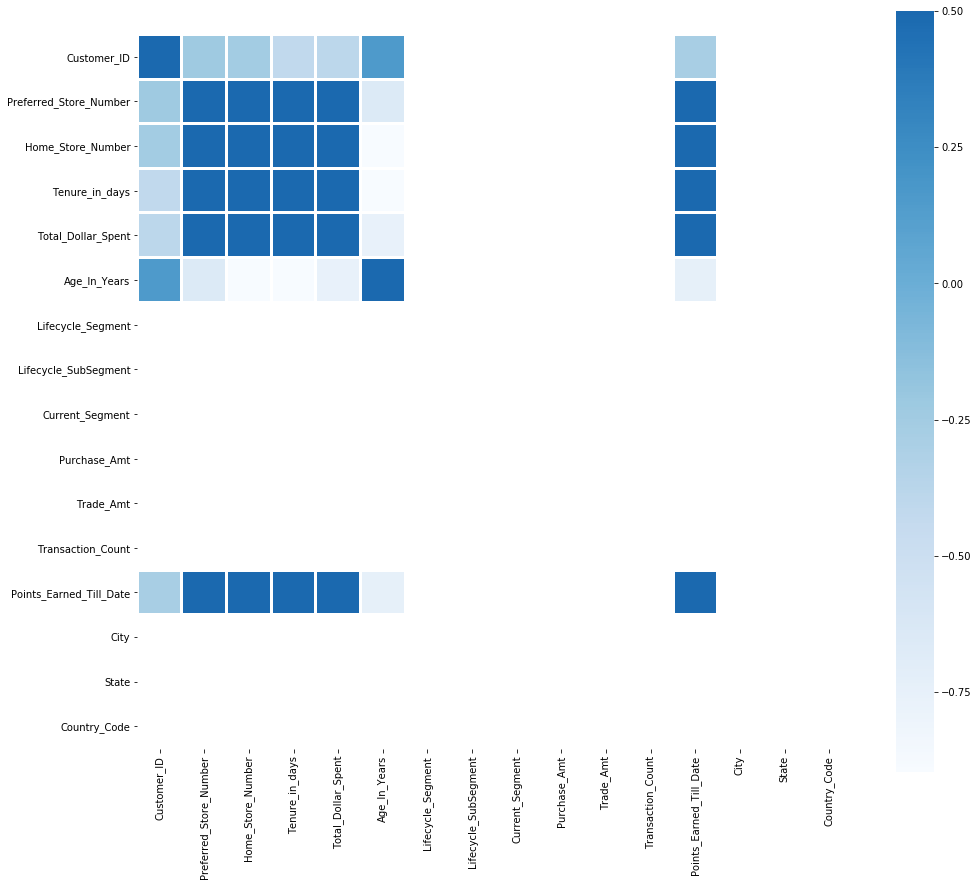

In [97]:
corr = digit_data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [62]:
categ_data.columns
label_categ.head()


,Tier,TierRenewalStatus,TierExpirationStatus
0,2,Lapsed from Renewing Elite Pro,Expired
1,2,Lapsed from Renewing Elite Pro,Expired
2,2,Lapsed from Renewing Elite Pro,Expired
3,2,Lapsed from Renewing Elite Pro,Expired
4,2,Lapsed from Renewing Elite Pro,Expired


In [66]:

# Make copy to avoid changing original data 
label_categ = categ_data.copy()
print(label_categ.head())

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in categ_data.columns:
    label_categ[col] = label_encoder.fit_transform(label_categ[col])
    



     Tier               TierRenewalStatus TierExpirationStatus
0  Player  Lapsed from Renewing Elite Pro              Expired
1  Player  Lapsed from Renewing Elite Pro              Expired
2  Player  Lapsed from Renewing Elite Pro              Expired
3  Player  Lapsed from Renewing Elite Pro              Expired
4  Player  Lapsed from Renewing Elite Pro              Expired


In [67]:
label_categ.head()

,Tier,TierRenewalStatus,TierExpirationStatus
0,2,0,0
1,2,0,0
2,2,0,0
3,2,0,0
4,2,0,0


In [69]:
data_preped = pd.concat([digit_data, label_categ], axis=1)
data_preped.head()

,Customer_ID,Preferred_Store_Number,Home_Store_Number,Loyalty_Account_Creation_Date,Loyalty_Account_Effective_Date,Tenure_in_days,Total_Dollar_Spent,Age_In_Years,Lifecycle_Segment,Lifecycle_SubSegment,...,Purchase_Amt,Trade_Amt,Transaction_Count,Points_Earned_Till_Date,City,State,Country_Code,Tier,TierRenewalStatus,TierExpirationStatus
0,1058530417,6213.0,6213.0,2010-12-10,2016-04-10,3686.0,3942.37,30.0,99.0,99.0,...,99.0,99.0,99.0,185710.0,99.0,99.0,99.0,2,0,0
1,1089486330,3255.0,5588.0,2011-03-04,2016-12-19,3602.0,8277.53,26.0,99.0,99.0,...,99.0,99.0,99.0,141000.0,99.0,99.0,99.0,2,0,0
2,1259811549,717.0,717.0,2013-10-07,2013-10-07,2654.0,1543.72,37.0,99.0,99.0,...,99.0,99.0,99.0,55000.0,99.0,99.0,99.0,2,0,0
3,1010407591,5185.0,5185.0,2011-03-29,2018-04-13,3577.0,4071.94,67.0,99.0,99.0,...,99.0,99.0,99.0,120000.0,99.0,99.0,99.0,2,0,0
4,1095869306,5150.0,5150.0,2011-04-30,2017-09-03,3545.0,4319.72,27.0,99.0,99.0,...,99.0,99.0,99.0,138613.0,99.0,99.0,99.0,2,0,0


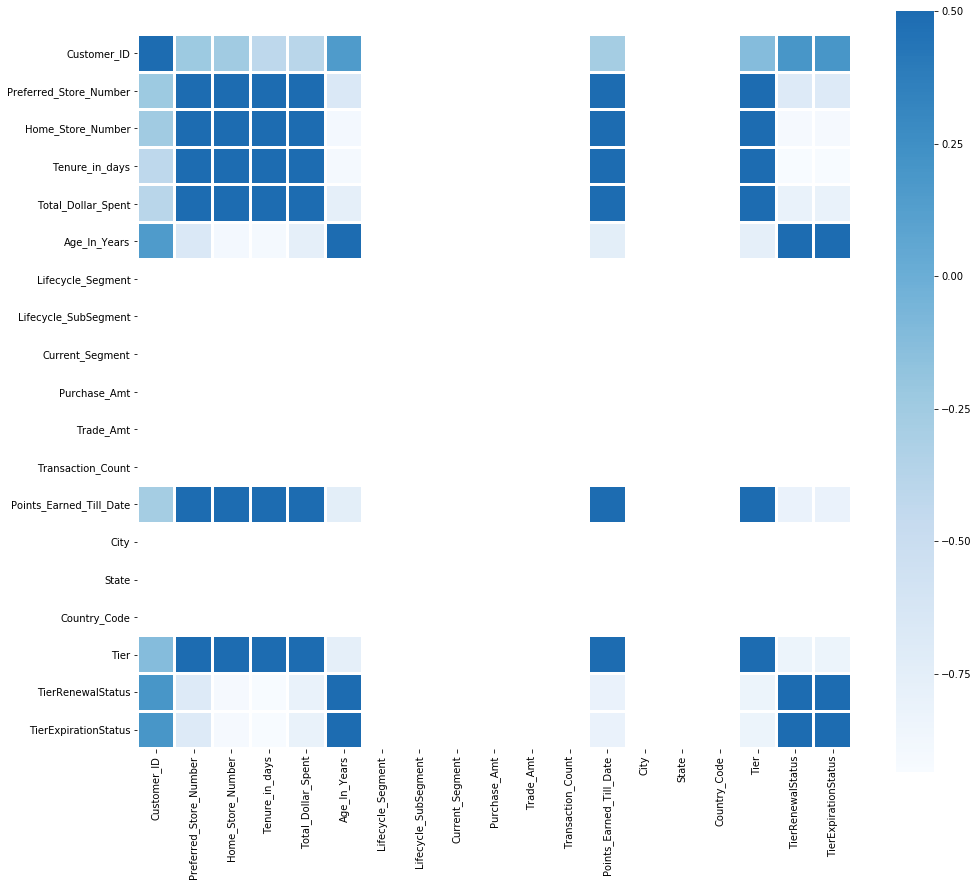

In [70]:
corr = data_preped.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [82]:
data_preped['Loyalty_Account_Creation_Date'] = pd.to_datetime(data_preped['Loyalty_Account_Creation_Date'])
data_preped['Loyalty_Account_Effective_Date'] = pd.to_datetime(data_preped['Loyalty_Account_Effective_Date'])
data_preped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
Customer_ID                       100 non-null int64
Preferred_Store_Number            100 non-null float64
Home_Store_Number                 100 non-null float64
Loyalty_Account_Creation_Date     100 non-null datetime64[ns]
Loyalty_Account_Effective_Date    100 non-null datetime64[ns]
Tenure_in_days                    100 non-null float64
Total_Dollar_Spent                100 non-null float64
Age_In_Years                      100 non-null float64
Lifecycle_Segment                 100 non-null float64
Lifecycle_SubSegment              100 non-null float64
Current_Segment                   100 non-null float64
Purchase_Amt                      100 non-null float64
Trade_Amt                         100 non-null float64
Transaction_Count                 100 non-null float64
Points_Earned_Till_Date           100 non-null float64
City                              100 non-null float64
Stat

In [83]:
print(data_preped.shape)
print(data_preped.columns)
print(data_preped.describe())

(100, 21)
Index(['Customer_ID', 'Preferred_Store_Number', 'Home_Store_Number',
       'Loyalty_Account_Creation_Date', 'Loyalty_Account_Effective_Date',
       'Tenure_in_days', 'Total_Dollar_Spent', 'Age_In_Years',
       'Lifecycle_Segment', 'Lifecycle_SubSegment', 'Current_Segment',
       'Purchase_Amt', 'Trade_Amt', 'Transaction_Count',
       'Points_Earned_Till_Date', 'City', 'State', 'Country_Code', 'Tier',
       'TierRenewalStatus', 'TierExpirationStatus'],
      dtype='object')
        Customer_ID  Preferred_Store_Number  Home_Store_Number  \
count  1.000000e+02              100.000000         100.000000   
mean   1.200283e+09              516.410000         654.260000   
std    4.952769e+07             1361.987437        1571.101316   
min    1.010408e+09               99.000000          99.000000   
25%    1.169348e+09               99.000000          99.000000   
50%    1.206173e+09               99.000000          99.000000   
75%    1.236911e+09               99.000000 

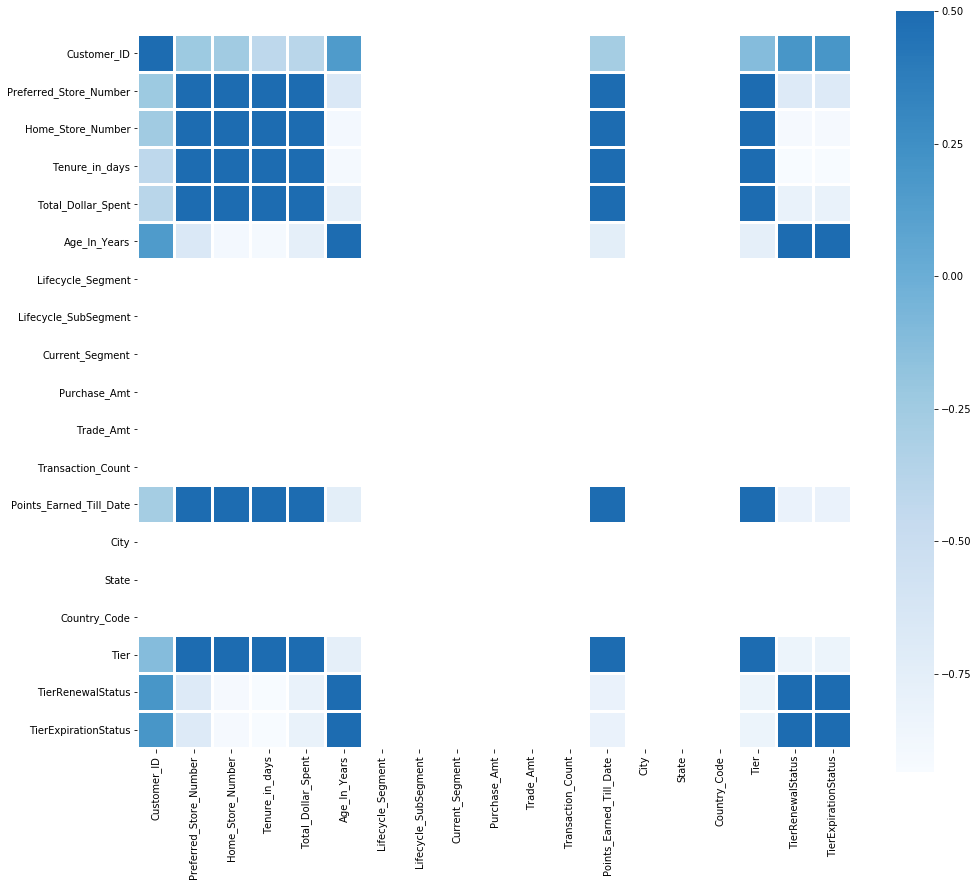

In [75]:
corr = data_preped.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [77]:
print(train.columns)

data_preped.corr()['Total_Dollar_Spent']

Index(['Customer_ID', 'Preferred_Store_Number', 'Home_Store_Number',
       'Loyalty_Account_Creation_Date', 'Loyalty_Account_Effective_Date',
       'Tier', 'TierRenewalStatus', 'TierExpirationStatus', 'Tenure_in_days',
       'Total_Dollar_Spent', 'Age_In_Years', 'Gender_Description',
       'Loyalty_Account_Status_Description', 'Lifecycle_Segment',
       'Lifecycle_SubSegment', 'Current_Segment', 'Purchase_Amt', 'Trade_Amt',
       'Transaction_Count', 'Points_Earned_Till_Date', 'City', 'State',
       'Country_Code'],
      dtype='object')


Customer_ID               -0.388412
Preferred_Store_Number     0.593437
Home_Store_Number          0.738395
Tenure_in_days             0.878591
Total_Dollar_Spent         1.000000
Age_In_Years              -0.756903
Lifecycle_Segment               NaN
Lifecycle_SubSegment            NaN
Current_Segment                 NaN
Purchase_Amt                    NaN
Trade_Amt                       NaN
Transaction_Count               NaN
Points_Earned_Till_Date    0.909407
City                            NaN
State                           NaN
Country_Code                    NaN
Tier                       0.765676
TierRenewalStatus         -0.799940
TierExpirationStatus      -0.799940
Name: Total_Dollar_Spent, dtype: float64

In [98]:
corr_features = ['Customer_ID', 
                 'Preferred_Store_Number', 
                 'Home_Store_Number', 
                 'Tenure_in_days', 
                 'Total_Dollar_Spent', 
                 'Age_In_Years', 
                 'Points_Earned_Till_Date', 
                 'Tier',
                 'TierRenewalStatus', 
                 'TierExpirationStatus']

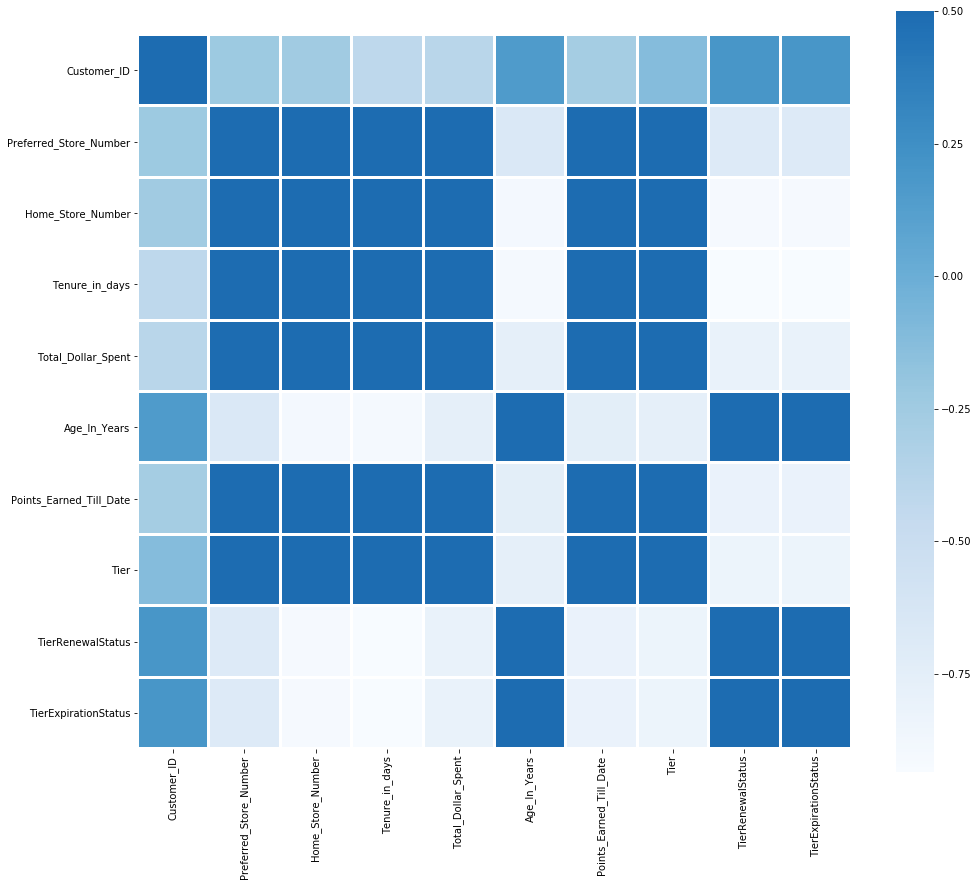

In [100]:

corr = data_preped[corr_features].corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [123]:
# Drop columns with low correlation
corred_features = [ 
                 'Preferred_Store_Number', 
                 'Home_Store_Number', 
                 'Tenure_in_days',
                 'Age_In_Years', 
                 'Points_Earned_Till_Date', 
                 'Tier',
                 'TierRenewalStatus', 
                 'TierExpirationStatus',
                 'Total_Dollar_Spent']
predictors = data_preped[corred_features]


targets = data_preped.Purchase_Amt

X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=.3)

print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )

In [115]:
data_preped.to_csv(r'../data_preped.csv', index = False)

In [121]:
data_preped.columns


Index(['Customer_ID', 'Preferred_Store_Number', 'Home_Store_Number',
       'Loyalty_Account_Creation_Date', 'Loyalty_Account_Effective_Date',
       'Tenure_in_days', 'Total_Dollar_Spent', 'Age_In_Years',
       'Lifecycle_Segment', 'Lifecycle_SubSegment', 'Current_Segment',
       'Purchase_Amt', 'Trade_Amt', 'Transaction_Count',
       'Points_Earned_Till_Date', 'City', 'State', 'Country_Code', 'Tier',
       'TierRenewalStatus', 'TierExpirationStatus'],
      dtype='object')

In [129]:

classifier=GaussianNB()
classifier=classifier.fit(X_train, y_train)

predictions=classifier.predict(X_test)

#Analyze accuracy of predictions
print('confusion matrix:')
sklearn.metrics.confusion_matrix(y_test, predictions)



confusion matrix:


array([[30]], dtype=int64)

In [130]:

#model score
print('model score:')
print(sklearn.metrics.accuracy_score(y_test, predictions))

model score:
1.0


In [119]:

'''
RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
'''


forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
prop_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, prop_preds))



45.820878250233974


C:\Users\MMQuant\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [131]:
"""
TEST WITH NEW DATA ai_CUSTOMERS_WITHOUT_NULLS
"""

new_data = pd.read_csv('../ai_CUSTOMER_WITHOUT_NULLS.csv')

In [133]:
print(new_data.shape)
print(new_data.columns)
new_data.head()

(16000, 37)
Index(['Sales_Transaction_ID', 'Store_Number', 'Business_Date',
       'Loyalty_Card_Number', 'Customer_ID', 'Transaction_Number',
       'Total_Selling_Price_Amt', 'Sales_GAAP_Qty', 'Sales_GAAP_Amt',
       'COGS_GAAP_Amt', 'Gross_Margin_GAAP_Amt', 'HW_Qty', 'Non_HW_Qty',
       'HW_Gaming_Qty', 'Non_HW_Gaming_Qty', 'SW_Qty', 'Non_SW_Qty',
       'SW_Gaming_Qty', 'Non_SW_Gaming_Qty', 'HW_Attach_Qty',
       'New_HW_Attach_Qty', 'PreOwned_HW_Attach_Qty', 'SW_Attach_Qty',
       'GPG_Attach', 'PRP_Qty', 'GPG_Qty', 'PRP_Attach', 'Has_Sales_Trans',
       'Has_GAAP_Return', 'Has_GAAP_Sale', 'Has_Web_Creation',
       'Has_PUR_Membership', 'Has_Pro_Renewal', 'Has_Pro_Upgrade', 'Tier',
       'Tier_Entered_Date', 'Tier_Expiration_Date'],
      dtype='object')


,Sales_Transaction_ID,Store_Number,Business_Date,Loyalty_Card_Number,Customer_ID,Transaction_Number,Total_Selling_Price_Amt,Sales_GAAP_Qty,Sales_GAAP_Amt,COGS_GAAP_Amt,...,Has_Sales_Trans,Has_GAAP_Return,Has_GAAP_Sale,Has_Web_Creation,Has_PUR_Membership,Has_Pro_Renewal,Has_Pro_Upgrade,Tier,Tier_Entered_Date,Tier_Expiration_Date
0,8716850993,5886,2020-12-08,3881086284395,1289830408,38,476.28,18,461.29,171.17,...,1,0,1,0,1,0,1,Pro,2020-12-08,2021-12-08
1,8716909311,7676,2020-12-08,3881143982262,1301120666,41,384.89,13,369.90,279.66,...,1,0,1,0,1,0,1,Pro,2020-12-08,2021-12-09
2,8716742651,3518,2020-12-08,3880155214150,1299105246,44,464.89,12,446.77,356.28,...,1,0,1,0,1,0,0,Player,2020-08-09,2099-01-01
3,8716680067,1611,2020-12-08,3881143951705,1130029413,2,894.58,16,879.17,723.50,...,1,0,1,0,1,0,1,Pro,2020-12-08,2021-12-08
4,8716752606,3700,2020-12-08,3881084015247,1117061055,29,303.37,15,298.37,218.65,...,1,0,1,0,1,0,1,Pro,2020-08-10,2021-08-10


In [134]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 37 columns):
Sales_Transaction_ID       16000 non-null int64
Store_Number               16000 non-null int64
Business_Date              16000 non-null object
Loyalty_Card_Number        16000 non-null int64
Customer_ID                16000 non-null int64
Transaction_Number         16000 non-null int64
Total_Selling_Price_Amt    16000 non-null float64
Sales_GAAP_Qty             16000 non-null int64
Sales_GAAP_Amt             16000 non-null float64
COGS_GAAP_Amt              16000 non-null float64
Gross_Margin_GAAP_Amt      16000 non-null float64
HW_Qty                     16000 non-null int64
Non_HW_Qty                 16000 non-null int64
HW_Gaming_Qty              16000 non-null int64
Non_HW_Gaming_Qty          16000 non-null int64
SW_Qty                     16000 non-null int64
Non_SW_Qty                 16000 non-null int64
SW_Gaming_Qty              16000 non-null int64
Non_SW_Gaming_Qty 

In [135]:
new_data.describe()

,Sales_Transaction_ID,Store_Number,Loyalty_Card_Number,Customer_ID,Transaction_Number,Total_Selling_Price_Amt,Sales_GAAP_Qty,Sales_GAAP_Amt,COGS_GAAP_Amt,Gross_Margin_GAAP_Amt,...,PRP_Qty,GPG_Qty,PRP_Attach,Has_Sales_Trans,Has_GAAP_Return,Has_GAAP_Sale,Has_Web_Creation,Has_PUR_Membership,Has_Pro_Renewal,Has_Pro_Upgrade
count,1.600000e+04,16000.000000,1.600000e+04,1.600000e+04,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,...,16000.000000,16000.000000,16000.000000,16000.0,16000.000000,16000.000000,16000.0,16000.0,16000.0,16000.000000
mean,8.494272e+09,4081.431562,3.879668e+12,1.178873e+09,1.813051e+06,230.430493,7.808063,206.375708,151.891009,54.484699,...,0.631875,1.602000,0.272701,1.0,0.347625,0.711562,0.0,1.0,0.0,0.589313
std,1.156224e+08,2125.026094,6.867562e+10,1.079559e+08,1.567623e+07,447.763230,11.446792,418.291790,311.861982,138.957212,...,1.145072,2.979371,0.481147,0.0,0.476231,0.453050,0.0,0.0,0.0,0.491974
min,8.317867e+09,6.000000,2.405638e+08,1.002773e+09,2.000000e+00,-1827.160000,-39.000000,-1827.160000,-1628.160000,-1085.410000,...,-8.000000,-20.000000,-2.000000,1.0,0.000000,0.000000,0.0,1.0,0.0,0.000000
25%,8.396850e+09,2515.000000,3.880014e+12,1.077219e+09,1.100000e+01,-129.565000,-4.000000,-131.982500,-42.922500,-67.910000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,1.0,0.0,0.000000
50%,8.474089e+09,4070.000000,3.881064e+12,1.259576e+09,2.400000e+01,212.940000,12.000000,197.555000,98.530000,62.315000,...,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.0,1.0,0.0,1.000000
75%,8.590848e+09,5889.000000,3.881124e+12,1.284589e+09,4.400000e+01,524.942500,15.000000,489.300000,353.760000,148.502500,...,1.000000,3.000000,0.500000,1.0,1.000000,1.000000,0.0,1.0,0.0,1.000000
max,8.732286e+09,7828.000000,3.887027e+12,1.301949e+09,1.513607e+08,6326.610000,163.000000,6326.610000,5220.640000,1259.760000,...,10.000000,58.000000,5.000000,1.0,1.000000,1.000000,0.0,1.0,0.0,1.000000


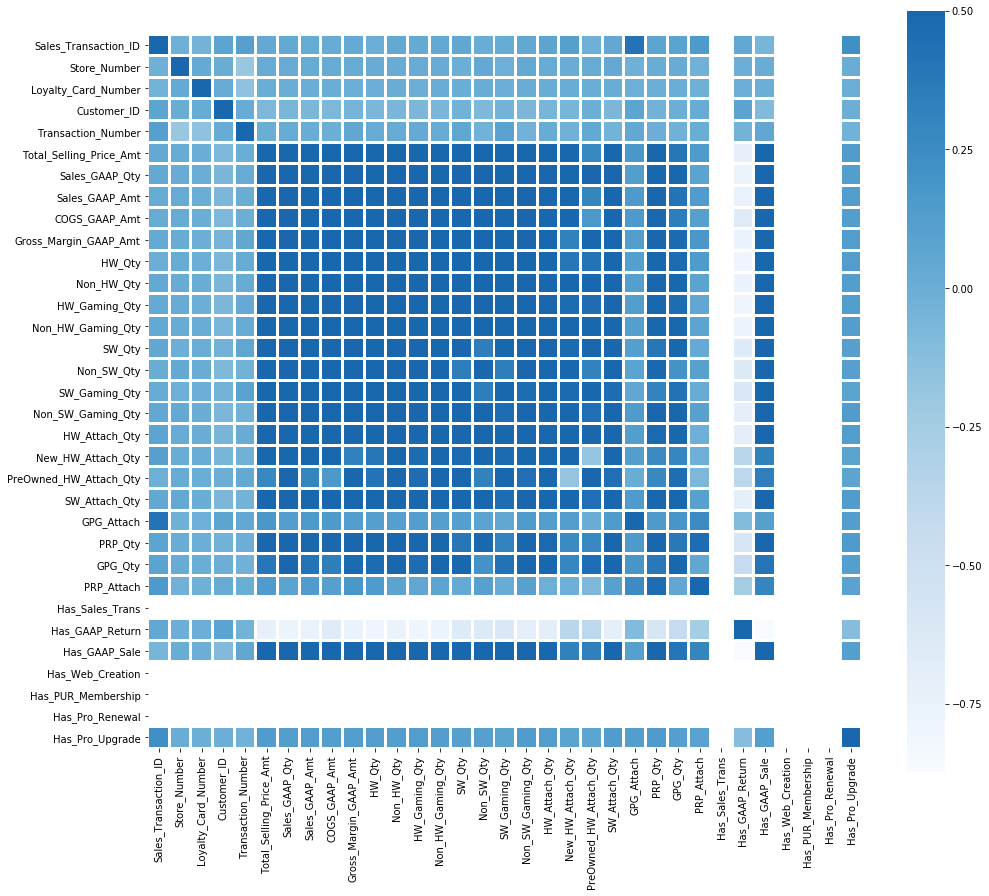

In [136]:
corr_new = new_data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_new, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [146]:
feat_to_drop = ['Customer_ID',
                'Has_Pro_Renewal',
                'Has_Web_Creation', 
                'Has_PUR_Membership', 
                'Has_Sales_Trans']

prep_new_data = new_data.drop(feat_to_drop, axis=1)


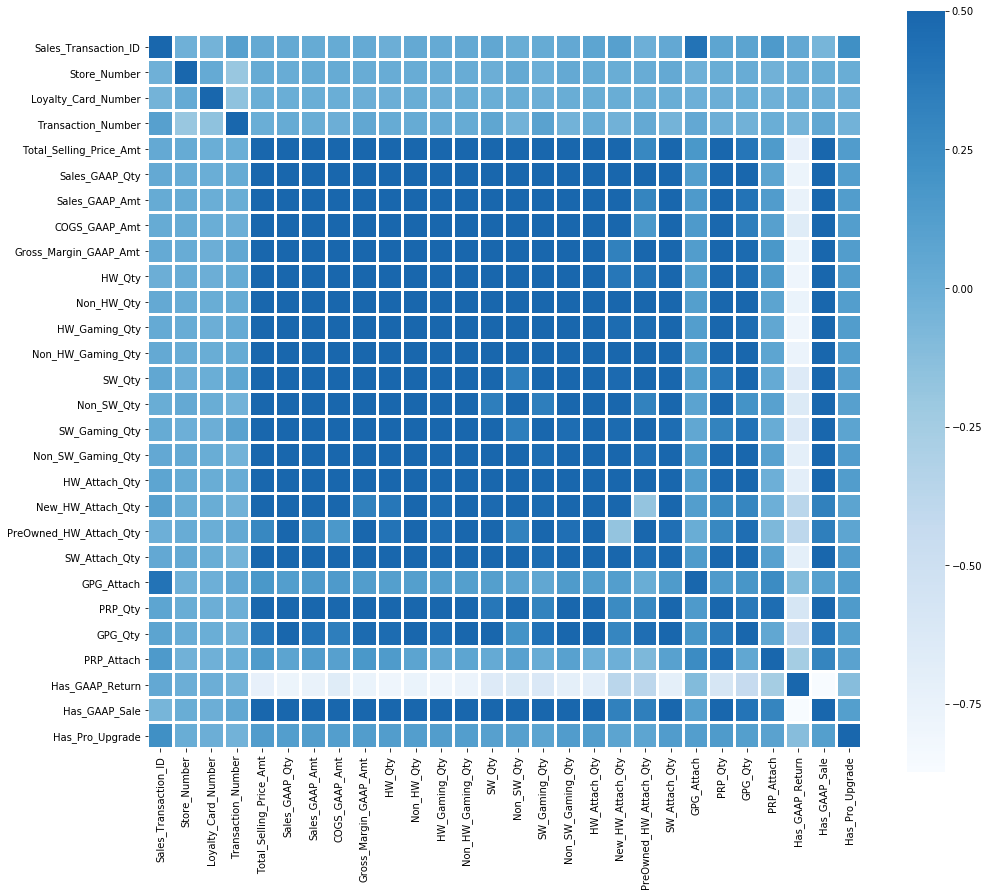

In [147]:
corr_new_preped = prep_new_data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_new_preped, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [160]:
"""
# converting Business_Date, Tier_Entered_Date, Tier_Expiration_Date from string to datetime

prep_new_data.Business_Date = pd.to_datetime(prep_new_data.Business_Date)
prep_new_data.Tier_Entered_Date = pd.to_datetime(prep_new_data.Tier_Entered_Date )
prep_new_data.Tier_Expiration_Date = pd.to_datetime(prep_new_data.Tier_Expiration_Date)
"""


print(categ_data.columns)
label_categ.head()

# Make copy to avoid changing original data 
label_categ = categ_data.copy()
print(label_categ.head())

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in categ_data.columns:
    label_categ[col] = label_encoder.fit_transform(label_categ[col])
    



Index(['Tier', 'TierRenewalStatus', 'TierExpirationStatus'], dtype='object')
     Tier               TierRenewalStatus TierExpirationStatus
0  Player  Lapsed from Renewing Elite Pro              Expired
1  Player  Lapsed from Renewing Elite Pro              Expired
2  Player  Lapsed from Renewing Elite Pro              Expired
3  Player  Lapsed from Renewing Elite Pro              Expired
4  Player  Lapsed from Renewing Elite Pro              Expired


In [161]:
label_categ.head()

,Tier,TierRenewalStatus,TierExpirationStatus
0,2,0,0
1,2,0,0
2,2,0,0
3,2,0,0
4,2,0,0


In [164]:
prep_new_data.drop(['Tier'], axis =1)

prep_new_data['Tier'] = label_categ['Tier']

,Sales_Transaction_ID,Store_Number,Business_Date,Loyalty_Card_Number,Transaction_Number,Total_Selling_Price_Amt,Sales_GAAP_Qty,Sales_GAAP_Amt,COGS_GAAP_Amt,Gross_Margin_GAAP_Amt,...,SW_Attach_Qty,GPG_Attach,PRP_Qty,GPG_Qty,PRP_Attach,Has_GAAP_Return,Has_GAAP_Sale,Has_Pro_Upgrade,Tier_Entered_Date,Tier_Expiration_Date
0,8716850993,5886,2020-12-08,3881086284395,38,476.28,18,461.29,171.17,290.12,...,11,0.500000,2,7,1.0,0,1,1,2020-12-08,2021-12-08
1,8716909311,7676,2020-12-08,3881143982262,41,384.89,13,369.90,279.66,90.24,...,10,0.500000,1,3,0.5,0,1,1,2020-12-08,2021-12-09
2,8716742651,3518,2020-12-08,3880155214150,44,464.89,12,446.77,356.28,90.49,...,8,0.000000,1,0,0.5,0,1,0,2020-08-09,2099-01-01
3,8716680067,1611,2020-12-08,3881143951705,2,894.58,16,879.17,723.50,155.67,...,14,0.500000,2,2,0.5,0,1,1,2020-12-08,2021-12-08
4,8716752606,3700,2020-12-08,3881084015247,29,303.37,15,298.37,218.65,79.72,...,14,0.500000,1,1,0.5,0,1,1,2020-08-10,2021-08-10
5,8716754130,3738,2020-12-08,3881104266770,12,1102.56,28,963.97,706.85,257.12,...,26,0.500000,3,7,1.0,0,1,1,2020-06-23,2022-03-08
6,8716706521,2607,2020-12-08,3881143861623,29,-432.93,-7,-396.20,-189.45,-206.75,...,-7,0.500000,-2,-1,1.0,1,0,1,2020-12-08,2021-12-06
7,8716868247,6215,2020-12-08,3880170698361,15,-444.94,-7,-444.94,-357.84,-87.10,...,-6,0.500000,-1,-1,0.5,1,0,0,2020-12-06,2099-01-01
8,8716659030,882,2020-12-08,3881143694321,3,-387.96,-4,-387.96,-151.47,-236.49,...,-3,-0.000000,-1,0,0.5,1,0,1,2020-12-03,2021-12-03
9,8716657446,850,2020-12-08,3881143685931,5,-460.95,-5,-460.95,-238.99,-221.96,...,-2,-0.000000,0,0,-0.0,1,0,1,2020-12-03,2021-12-03


In [166]:
prep_new_data['Tier'] = label_categ['Tier']

In [158]:

'''
//TO DO fix some problems in:

RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


predictors_RF = prep_new_data.drop(['Business_Date', 'Tier_Entered_Date', 'Tier_Expiration_Date'], axis=1)


targets_RF = prep_new_data.Has_Pro_Upgrade

X_train, X_test, y_train, y_test  =   train_test_split(predictors_RF, targets_RF, test_size=.3)

print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )

forest_model_new = RandomForestRegressor(random_state=1)
forest_model_new.fit(X_train, y_train)
prop_preds_new = forest_model_new.predict(X_test)
print(mean_absolute_error(y_test, prop_preds))

'''

'\nRANDOM FOREST MODEL\n\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_absolute_error\n\n\npredictors_RF = prep_new_data.drop([\'Business_Date\', \'Tier_Entered_Date\', \'Tier_Expiration_Date\'], axis=1)\n\n\ntargets_RF = prep_new_data.Has_Pro_Upgrade\n\nX_train, X_test, y_train, y_test  =   train_test_split(predictors_RF, targets_RF, test_size=.3)\n\nprint( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )\n\nforest_model_new = RandomForestRegressor(random_state=1)\nforest_model_new.fit(X_train, y_train)\nprop_preds_new = forest_model_new.predict(X_test)\nprint(mean_absolute_error(y_test, prop_preds))\n\n'

In [ ]:

prep_new_data = prep_new_data.drop(['Business_Date' ,'Tier_Entered_Date', 'Tier_Expiration_Date' ], axis=1)

In [180]:

prep_new_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 29 columns):
Sales_Transaction_ID       5 non-null int64
Store_Number               5 non-null int64
Loyalty_Card_Number        5 non-null int64
Transaction_Number         5 non-null int64
Total_Selling_Price_Amt    5 non-null float64
Sales_GAAP_Qty             5 non-null int64
Sales_GAAP_Amt             5 non-null float64
COGS_GAAP_Amt              5 non-null float64
Gross_Margin_GAAP_Amt      5 non-null float64
HW_Qty                     5 non-null int64
Non_HW_Qty                 5 non-null int64
HW_Gaming_Qty              5 non-null int64
Non_HW_Gaming_Qty          5 non-null int64
SW_Qty                     5 non-null int64
Non_SW_Qty                 5 non-null int64
SW_Gaming_Qty              5 non-null int64
Non_SW_Gaming_Qty          5 non-null int64
HW_Attach_Qty              5 non-null int64
New_HW_Attach_Qty          5 non-null int64
PreOwned_HW_Attach_Qty     5 non-null int64
SW_Attach_Q

In [182]:
predictors_new = prep_new_data.drop('Has_Pro_Upgrade', axis=1)


targets_new = prep_new_data.Has_Pro_Upgrade

X_train, X_test, y_train, y_test  =   train_test_split(predictors_new, targets_new, test_size=.3)

print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )

Predictor - Training :  (3, 28) Predictor - Testing :  (2, 28)


In [183]:

clf =GaussianNB()
clf = clf.fit(X_train, y_train)

predictions_GAUclf = clf.predict(X_test)

#Analyze accuracy of predictions
print('confusion matrix:')
sklearn.metrics.confusion_matrix(y_test, predictions_GAUclf)

confusion matrix:


array([[0, 1],
       [0, 1]], dtype=int64)